# Ampl_xcorr test

In [1]:
#Import Modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import NeuroDSP 
from neurodsp import sim
from neurodsp.filt import filter_signal
from neurodsp.sim import sim_combined
from neurodsp.utils import create_times
from neurodsp.timefrequency import amp_by_time
from neurodsp.plts.time_series import plot_time_series

# Import amp xcorr
from Amp_xcorr import *

## Simulate periodic signal

In [ ]:
# set the random seed, for consistency simulating data
sim.set_random_seed(0)

# define length and sample freq
n_seconds = 20
fs = 1000

# create time vector
times = create_times(n_seconds, fs)

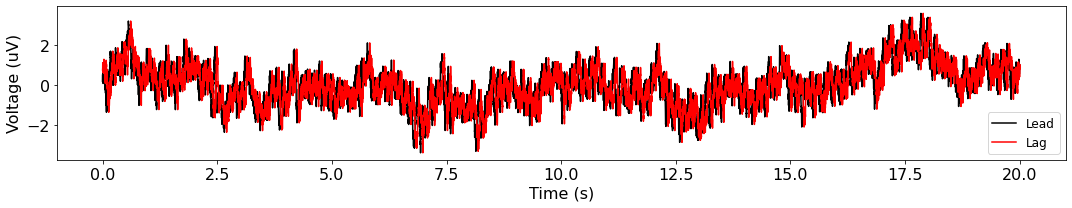

In [6]:
# desired lag
lag_in_ms = 50
lag_in_samples = round(lag_in_ms*(fs/1000))

# define simulated oscillation w/noise
components = {'sim_powerlaw' : {'exponent' : -1.4},
              'sim_oscillation' : {'freq' : 7.5}}
variances = [2, .2]

# simulate oscillation w/noise
lead_sig = sim_combined(n_seconds, fs, components, variances)
lag_sig = np.roll(lead_sig, lag_in_samples) #circular shift 50ms

# plot
plot_time_series(times, [lead_sig, lag_sig], ['Lead', 'Lag'])

## Compute amplitude crosscorrelation

Max correlation:  0.9951817798077868
Lag:  -51.0


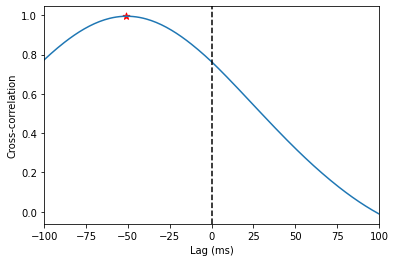

In [14]:
# compute amplitude crosscorrelation
max_xcorr, max_xcorr_lag = amp_xcorr(lead_sig, lag_sig, fs, [4, 12])

print('Max correlation: ', max_xcorr)
print('Lag: ', max_xcorr_lag)

## Bootstrap

In [15]:
# compute bootstrap
bs_dist = bootstrap_xcorr(lead_sig, lag_sig, fs, [4, 12])
 
# plot distribution with orginial xcorr
plt.hist(bs_dist)
plt.xlim([-.2, 1.1])
plt.axvline(x=max_xcorr, color= 'r', linestyle='-')
plt.xlabel('Crosscorrelation')
plt.ylabel('Number of Resamples')
plt.legend(['Original xcorr', 'Bootstrap dist'])

KeyboardInterrupt: 